# Analysing Video Games from 1980 to 2017 - Data Analyst Portfolio Project

This project focuses on a dataset that contains information on nearly all video games published from the year 1980 to the 2017. The purpose of this project is to gain an insight into the this industry and identify any popular trends that occured within this time period.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings). We'll use Python to analyze the dataset and use the pandas and SciPy libraries to answer the following questions:

1. What genre of game is most popular?
2. Which publishing company is the most popular/successful?
3. What are the highest global sales for each year?
4. For each publisher, in which region do they have the most sales? 
5. What platform was the dominant in each year?

## Import Libraries

In [402]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

vd_data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

## Load and Inspect Data 

In [403]:
vd_data.info()
vd_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains 16,720 rows and 16 columns containing information about video games. It looks like all columns except  'Name', 'Platform', 'Year of Release', 'Genre', 'Publisher', 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', and 'Global Sales' columns have some missing values.

Here's a quick summary of the columns:

- **Name**: Name of the game
- **Platform**: Console on which the game is running
- **Year of Release**: Year of the game released
- **Genre**: Game's category
- **Publisher**: Company that published the game
- **NA Sales**: Game sales in North America (in millions of units)
- **EU Sales**: Game sales in European Union (in millions of units)
- **JP Sales**: Game sales in Japan (in millions of units)
- **Other Sales**: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)
- **Critic Score**: Aggregate score compiled by Metacritic staff
- **Critic Count**: The number of critics used in coming up with the Critic_score
- **User Score**: Score by Metacritic's subscribers
- **User Count**: Number of users who gave the user_score
- **Developer**: Party responsible for creating the game
- **Rating**: The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)

In [404]:
vd_data.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


## Data Cleaning and Preparation

Firstly, we will remove unncessary columns for easier analysis. 

In [405]:
vd_data = vd_data.drop(columns = ['User_Score', 'User_Count', 'Developer', 'Rating', 'Critic_Score', 'Critic_Count'], axis = 1)

In [406]:
vd_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Question #1: What genre of game is most popular?

In [407]:
# Genre count
popular_genre = vd_data.Genre.value_counts().rename_axis('Genre').reset_index(name='Count')
popular_genre

,Genre,Count
0,Action,3370
1,Sports,2348
2,Misc,1750
3,Role-Playing,1500
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,874
9,Fighting,849


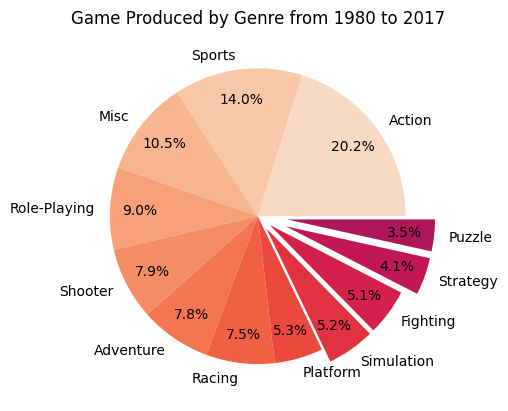

In [408]:
plt.pie(x = popular_genre['Count'], labels = popular_genre['Genre'], autopct = '%1.1f%%', 
        colors = sns.color_palette("rocket_r", 20), pctdistance = 0.8, explode = [0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.2])
plt.title('Game Produced by Genre from 1980 to 2017')
plt.show()

It seems that the 'Action' genre is the most popular genre accounting for 20.2% of games, followed by 'Sports' and 'Misc' genres with 14% and 10.5% respectively. 

In [409]:
top_sales = vd_data.groupby('Genre').Global_Sales.sum().sort_values(ascending = False).reset_index()
top_sales

,Genre,Global_Sales
0,Action,1745.27
1,Sports,1332.00
2,Shooter,1052.94
3,Role-Playing,934.40
4,Platform,828.08
5,Misc,803.18
6,Racing,728.90
7,Fighting,447.48
8,Simulation,390.42
9,Puzzle,243.02


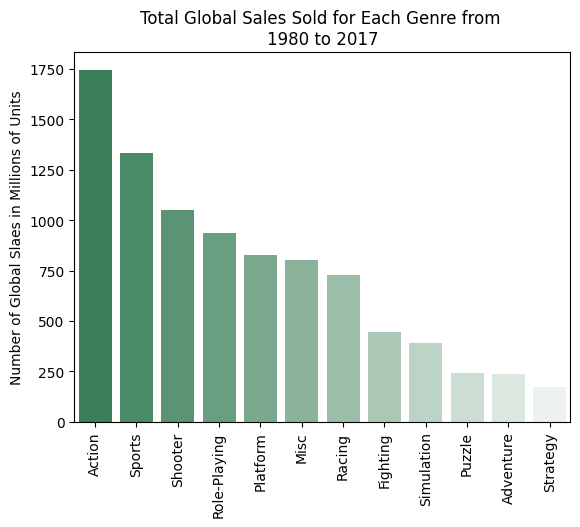

In [410]:
sns.barplot(x = top_sales.Genre, y = top_sales.Global_Sales, palette = sns.light_palette("seagreen", 12, reverse = True))
plt.xticks(rotation = 'vertical')
plt.xlabel('')
plt.title('Total Global Sales Sold for Each Genre from \n1980 to 2017')
plt.ylabel('Number of Global Slaes in Millions of Units')
plt.show()

According to the figure above, the 'Action' genre also has the highest number of global sales followed by the 'Sports' genre which is to be expected. However, the 'Shooter' genre has the third highest number of global sales which is suprising, considering that the genre only accounts for 7.9% of games produced. 

## Data Question 2: Which publishing company is the most popular/successful?

In [411]:
# Publisher Count
popular_publisher = vd_data.Publisher.value_counts().rename_axis('Publisher').reset_index(name='Count')
popular_publisher.head(10)

,Publisher,Count
0,Electronic Arts,1356
1,Activision,985
2,Namco Bandai Games,939
3,Ubisoft,933
4,Konami Digital Entertainment,834
5,THQ,715
6,Nintendo,706
7,Sony Computer Entertainment,687
8,Sega,638
9,Take-Two Interactive,422


They are over 500 publishing companies but we will only be focusing on the top 10 companies. There are several companies that have only published 1 game which would be irrelevant. 

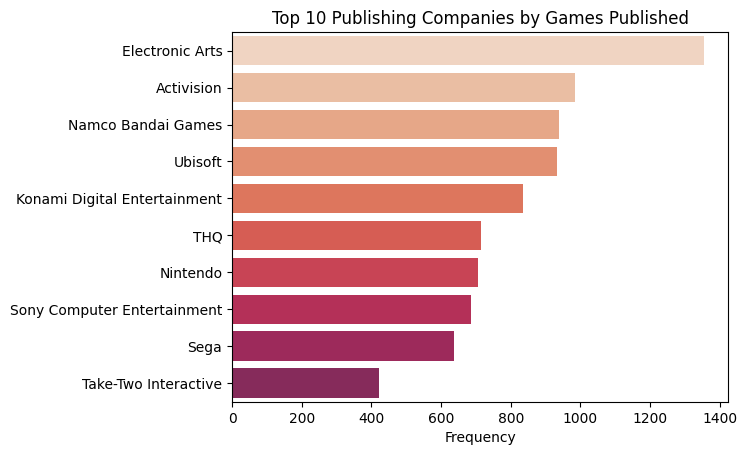

In [412]:
sns.barplot(data = popular_publisher[0:10], x = 'Count', y = 'Publisher', palette = sns.color_palette("rocket_r", 15))
plt.title("Top 10 Publishing Companies by Games Published")
plt.ylabel('')
plt.xlabel('Frequency')
plt.show()

Electronic Arts (EA) has the highest number of games produced with over 1250 games, followed by Activision and Namco Bandai Games. 

In [413]:
company_top_sales = vd_data.groupby('Publisher').Global_Sales.sum().reset_index().sort_values('Global_Sales', ascending = False)
company_top_sales.head(10)

,Publisher,Global_Sales
361,Nintendo,1788.81
139,Electronic Arts,1116.96
21,Activision,731.16
458,Sony Computer Entertainment,606.48
528,Ubisoft,471.61
497,Take-Two Interactive,403.82
491,THQ,338.44
277,Konami Digital Entertainment,282.39
448,Sega,270.35
349,Namco Bandai Games,254.62


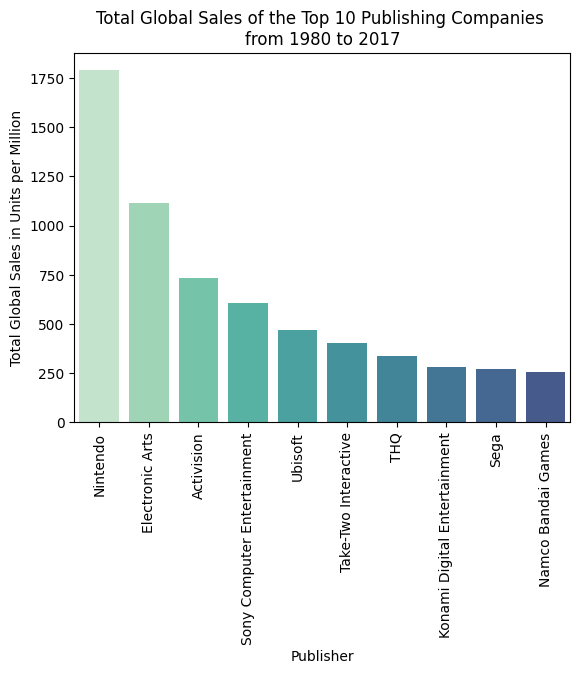

In [414]:
sns.barplot(x = company_top_sales.Publisher.head(10), y = company_top_sales.Global_Sales.head(10), 
            palette = sns.color_palette("mako_r", 15))
plt.title('Total Global Sales of the Top 10 Publishing Companies \nfrom 1980 to 2017')
plt.ylabel('Total Global Sales in Units per Million')
plt.xticks(rotation = 'vertical')
plt.show()

Nintendo has the highest global sales of approximately 1750 million units followed by Electronic Arts. Even though, Electronic Arts has published the most games, they only have a total global sale of approximately 1100 million which is significantly less compared to Nintendo. Activision has the next highest total global sales with approximately 750 million. 

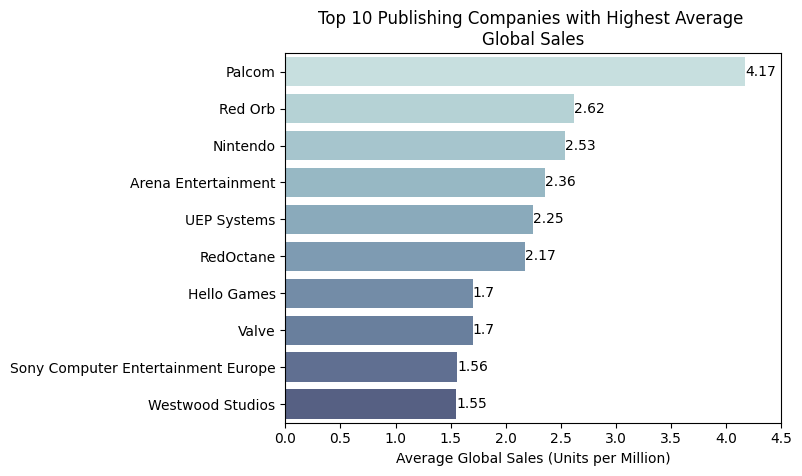

In [415]:
avg_sale = []
avg_sale_count = 0

publisher_avg_sales = vd_data.groupby('Publisher').Global_Sales.mean().reset_index().sort_values('Global_Sales', ascending = False)
publisher_avg_sales.head(10)

ax = sns.barplot(data = publisher_avg_sales[0:10], x = 'Global_Sales', y = 'Publisher', palette = sns.color_palette("ch:start=.2,rot=-.3", 14), 
            width = 0.8)
ax.bar_label(ax.containers[0], fmt='%1.3g')
plt.title('Top 10 Publishing Companies with Highest Average \nGlobal Sales')
plt.xlabel('Average Global Sales (Units per Million)')
plt.ylabel('')
plt.xlim(0, 4.5)
plt.show()

Palcom has the highest average global sales by a large margin with an average of approximately 4.2 million units sold per game published. Red Orb has the second highest average global sales with 2.62 million copies sold per game, followed by Nintendo with 2.53 million copies.

# Data Question #3: What are the highest global sales for each year?

In [416]:
top_sales_each_year = []
top_sale_count = 0
year_list = []
game = ''
game_of_the_year = []
year = 1980

while year <= 2017:
    year_list.append(year)
    for i in range(0, len(vd_data.Year_of_Release)):
        if vd_data.Year_of_Release[i] == year and vd_data.Global_Sales[i] > top_sale_count:
            top_sale_count = vd_data.Global_Sales[i]
            game = vd_data.Name[i]
    top_sales_each_year.append(top_sale_count)
    game_of_the_year.append(game)
    top_sale_count = 0
    game = ''
    year += 1

    
# print(top_sales_each_year)
# print(game_of_the_year)

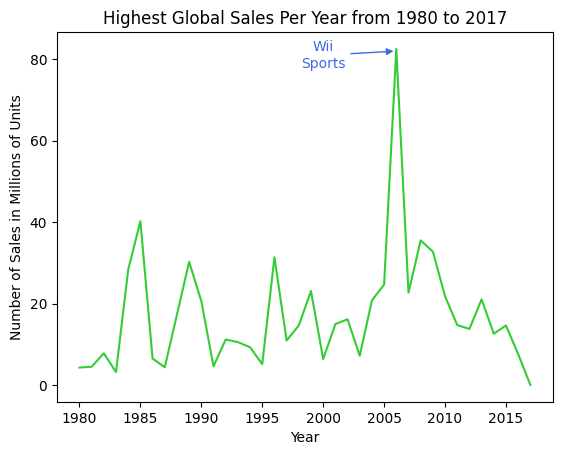

In [417]:
plt.plot(year_list,top_sales_each_year, color = 'limegreen')
plt.title('Highest Global Sales Per Year from 1980 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Sales in Millions of Units')
plt.annotate('Wii\nSports', ha = 'center', fontsize = 10, xy = (2006, 82), xytext = (2000, 78), color ='royalblue', arrowprops  = dict(arrowstyle = '-|>', color = 'royalblue'))
plt.xscale('linear')
plt.show()

The graph peaks in the year 2006 with a value of approximately 80 million units sold which is made by the game 'Wii Sports'. There are also peaks in the years 1985 and 2008. The most popular game of these years was 'Super Mario Bros.' and 'Mario Kart Wii' respectively. 

# Data Question #4: For each publisher, in which region do they have the most sales? 

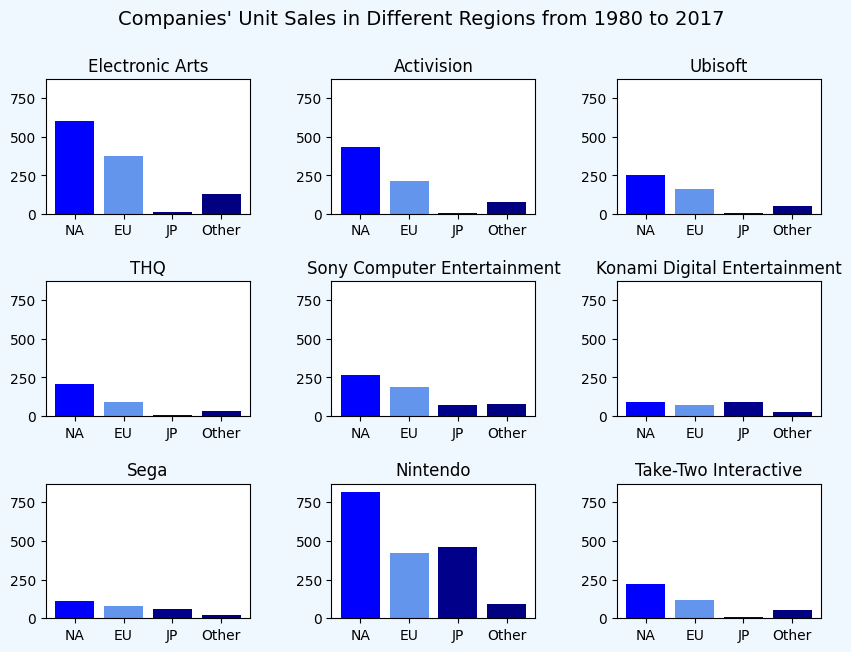

In [418]:
NA_sales = 0
EU_sales = 0
JP_sales = 0
Other_sales = 0
x_label = ['NA', 'EU', 'JP', 'Other']

fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 7))
fig.suptitle("Companies' Unit Sales in Different Regions from 1980 to 2017", fontsize = 14)

for i in range(0, 9):
    for n in range(0, len(vd_data.Publisher)):
        if vd_data.Publisher[n] == publisher_label[i]:
                NA_sales += vd_data.NA_Sales[n]
                EU_sales += vd_data.EU_Sales[n]
                JP_sales += vd_data.JP_Sales[n]
                Other_sales += vd_data.Other_Sales[n]
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.title(publisher_label[i], fontsize = 12)
    plt.bar(x = x_label, height = [NA_sales, EU_sales, JP_sales, Other_sales], color = ['blue', 'cornflowerblue', 'darkblue', 
                                                                                       'navy'])
    plt.xticks(fontsize = 10)
    plt.ylim(0, 870)
    NA_sales = 0
    EU_sales = 0
    JP_sales = 0
    Other_sales = 0
    
plt.show()

The figures above show the companies' regional sales from 1980 to 2017. Interestingly, all of the companies top regional sales come from the North American region, exclusing Konami Digital Entertainment and Namco Bandai Games. Considering that Nintendo has the highest global sales, it is not suprising that its regional sales are the highest among the others, followed by Electronic Arts. 

# Data Question #5: What platform was the dominant in each year?

In [423]:
# Platform Count
platform = vd_data.Platform.value_counts().rename_axis('Platform').reset_index(name='Count')
platform_sales = vd_data.groupby('Platform').Global_Sales.sum().sort_values(ascending = False).reset_index()
platform_sales.head(10)

,Platform,Global_Sales
0,PS2,1255.64
1,X360,971.63
2,PS3,939.43
3,Wii,908.13
4,DS,807.10
5,PS,730.68
6,GBA,318.50
7,PS4,314.23
8,PSP,294.30
9,PC,260.30


We will only focus on the top 10 platforms considering that thereis a considerable difference between the 9th and 10th console. 

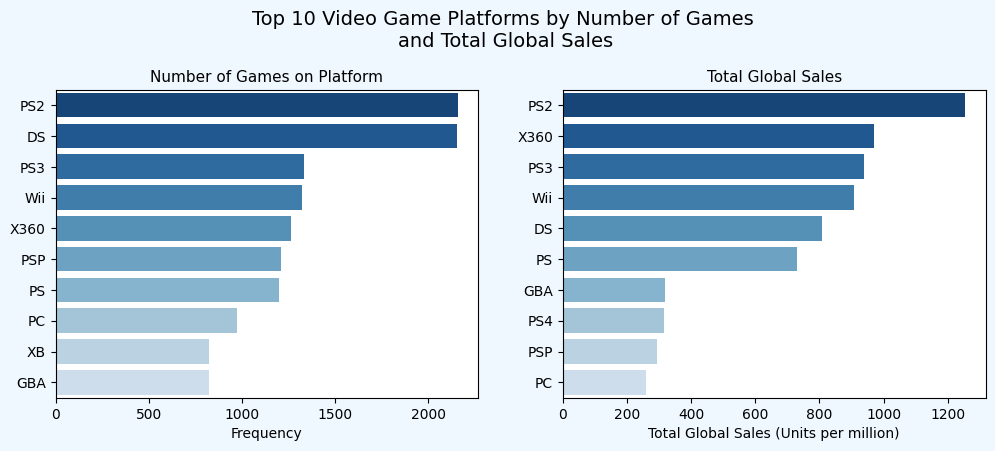

In [435]:
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 4))
fig.suptitle("Top 10 Video Game Platforms by Number of Games \nand Total Global Sales", fontsize = 14, y = 1.08)
plt.subplots_adjust(wspace = 0.2, hspace = 0.1)

plt.subplot(121)
sns.barplot(x = platform.Count[0:10], y = platform.Platform[0:10], palette = sns.color_palette("Blues_r", 12))
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('Number of Games on Platform', fontsize = 11)

plt.subplot(122)
sns.barplot(x = platform_sales.Global_Sales[0:10], y = platform_sales.Platform[0:10], palette = sns.color_palette("Blues_r", 12))
plt.ylabel('')
plt.title('Total Global Sales', fontsize = 11)
plt.xlabel('Total Global Sales (Units per million)')

plt.show()

The Playstation 2 has the highest number of games on it with around 2300 games, followed closely by the 'DS'. The Playstation 2 also has the highest total global sales with over 1200 million global units sold, followed by the XBox360 and PS3 with approximately 980 million and 960 million global sales respectively.

# Conclusion

The purpose of this analysis is to explore and gain some insight into the video game industry. We have identified the most popular game genre which is the 'Action' genre and the most popular console which is the 'Playstation 2'. We have also found a trend in regional sales which indicates that the 'North American' region is the most demanding region compared to the other regions such as Japan and Europe. We also found that global sales peaked around the year 2006 with Wii Sports as the most popular game. Lastly, we have gathered that the most successful video game platform is the 'Playstation 2'. It has the highest global sales among all the platforms and the highest number of games running on it. 